# <font color=black> Analysis - Resting state duration in the spinal cord </font>
<hr style="border:1px solid black">

**The goal of this analysis is to investigate the reproducibility of spinal networks extracted using different resting state duration.**

**METHODS CONSIDERED:**
- Independent Component Analysis – called `ica` in this script

**DATASETS:**
- A dataset covering C1 to C8 spinal levels, with a resolution of 1.6x1.6x4mm<sup>3</sup>  and a TR of 1.55s – called `mtl` in this script
- A dataset covering C5 to C8 spinal levels, with a resolution of 1x1x3mm<sup>3</sup> and a TR of 2.5s – called `gva` in this script

**ITERATION CONSIDERED:**
- 100,200,500,1000,2000,5000

**ANALYSES:**
- _**Qualitative:**_ matching & visualization of one or two set(s) of components
- _**Quantitative:**_Analysis of spatial similarity (for a single K)
    

In [1]:
import sys,json

sys.path.append('/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/hc_project_analyses/code/')

from plotting import Plotting
from spine_only_analysis import SpineOnlyAnalysis

%matplotlib inline
%load_ext autoreload
%autoreload 2

/cerebro/cerebro1/dataset/bmpd/derivatives/thibault_test/code/toolbox/bmpd_python/lib/python3.6/site-packages/nilearn/__init__.py:69: FutureWarning: Python 3.6 support is deprecated and will be removed in release 0.10 of Nilearn. Consider switching to Python 3.8 or 3.9.
  _python_deprecation_warnings()


# Initialization

### Load configuration file 

In [2]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

# Qualitative evaluation

### Visualizing components: "gva" 1min vs 15min

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord//K_9/comp_indiv/*z*P028_*4D_K


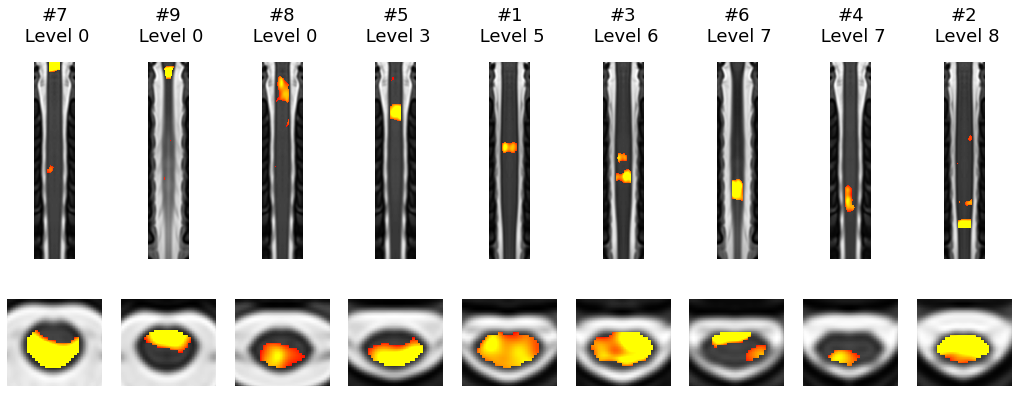

In [9]:
# Define parameters for the dataset to visualize
# Note: it is possible to look at a single dataset (in that case, just define params1), or to compare two (in that case, also add params2)
# Each param dict has 3 values: k, dataset and analysis

dataset="mtl"
for sub in ["P028"]:
    params_qual_1 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':'ica', 'subject':sub}

params_qual_2 = {'k':(9 if dataset == 'mtl' else 5), 'dataset':dataset, 'analysis':'ica'}


plotting = Plotting(config,'spinalcord',params1=params_qual_1,params2=None)
plotting.sc_plot(show_spinal_levels=False, k_per_line=9, lthresh=1.5, uthresh=3, save_results=False)

# Quantitative analyses

### Instantiate class
Note: the idea is to load all the possible K only once when instantiating the class

In [289]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="gva"
config['list_subjects']["gva"]=["01","02","03","05","06","07","08","09","10","11","12","13","14","15","16"]
params_quant_1 = {'k_range':range(5,6),'dataset':dataset, 'analysis':"icap"}
for sub in config['list_subjects']["gva"]:
    params_quant_2 = {'k_range':range(5,6), 'dataset':dataset, 'analysis':'icap', 'subject':'sub-'+sub}

spine_analysis = SpineOnlyAnalysis(config,params1=params_quant_1,params2=params_quant_2,load_subjects=True)

#spine_analysis.spatial_similarity(k1=5,k2=5,similarity_method='Euclidean distance',save_results=False,save_figure=False)
#spine_analysis.subject_distribution(spine_analysis.name1,k=5,thresh=1.5)

subject loading ...


In [327]:
spine_analysis.spatial_similarity(k1=5,k2=5,similarity_method='Dice',save_results=True,save_figure=False)


None
METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 5 vs gva_icap2 at K = 5 

The mean similarity are: 


In [11]:
import pandas as pd
input="/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project/ICA/results_spine_only/results/_gva_icap_vs_gva_icap2_similarity_across_K_indiv_comp.txt"
df=pd.read_csv(input, header=0,sep=' ')
#df["Euclidean distance"]=df["Euclidean distance"]*0.5
#df=df[df['components'] >0 ]
df

,subj_name,components,Dice
0,sub-01,0,0.622361
1,sub-01,1,0.631327
2,sub-01,2,0.615185
3,sub-01,3,0.348498
4,sub-01,4,0.607206
...,...,...,...
70,sub-16,0,0.632119
71,sub-16,1,0.453336
72,sub-16,2,0.595567
73,sub-16,3,0.552417


In [ ]:

#g.set_yticklabels(np.arange(0,0.1,0.02),fontsize=8);
g.add_legend()
g.set(ylim=(-0.01,0.08))
sns.despine(offset=40,trim=True)

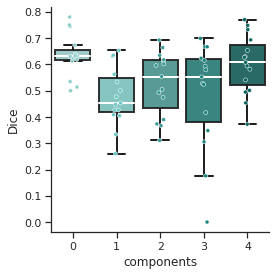

In [19]:
import seaborn as sns
colors=['#8dcdca','#6ccac6','#399b96','#19857f','#056660'] #'#273248'
sns.set(style="ticks")#,  font='sans-serif')
g=sns.catplot(y="Dice",x="components",data=df, kind="box", legend=True, legend_out=True,
             linewidth=2,medianprops=dict(color="white"),palette=colors, 
              boxprops=dict(alpha=.9),fliersize=0, height=4,aspect=1) #fliersize=0)

sns.stripplot(x="components", y="Dice",data=df, 
              size=4, palette=colors, linewidth=0.5,edgecolor='white')

#g.set_axis_labels(" ", "Dice coefficient",fontsize=12, fontweight='bold')
#g.set_xticklabels(["Components"],weight='bold',fontsize=12);


In [ ]:

# Add in points to show each observation
sns.stripplot(x="Groups_continue", y="zCorr",data=table_zCorr_bySubjects, 
              size=4, palette=colors, linewidth=0.5,edgecolor='white')

g.set_axis_labels(" ", "Correlation (z-score)",fontsize=12, fontweight='bold')
g.set_xticklabels(["HC","PDlow","PDmed","PDhigh"],weight='bold',fontsize=12);
#g.set_yticklabels(np.arange(0,0.1,0.02),fontsize=8);
g.add_legend()
g.set(ylim=(-0.01,0.08))
sns.despine(offset=40,trim=True)
#plt.savefig('/cerebro/cerebro1/dataset/bmpd/derivatives/Func_analyses/SpinalCord/ICA_SC/Figures/Figure_GlobalCorr_Grps.eps',dpi=500,transparent=True)


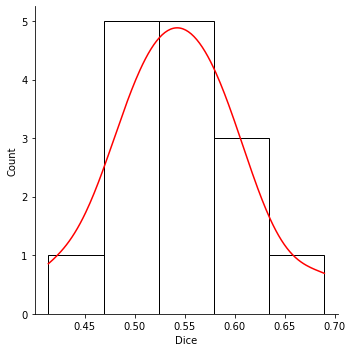

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.displot(df, x="similarity",kind="kde",cut=0.2)#, kind="kde", bw_adjust=2)

sns.displot(df, x="Dice", kde=True,  color="r", facecolor='w')


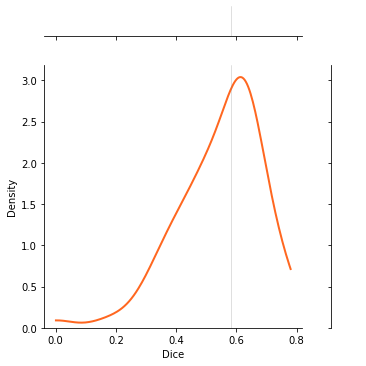

In [332]:
g = sns.JointGrid(height=5, ratio=5, space=1)
sns.kdeplot(x='Dice', linewidth=2, bw_adjust=1,
            data=df,ax=g.ax_joint,#hue="components",
            clip=[np.min(df['Dice']),np.max(df['Dice'])],
                  color='#FF6720')#'#F29D4B')
g.refline(x=np.median(df['Dice']), ls='-', c='grey',alpha=0.5,linewidth=0.5)

#sns.kdeplot(df, x='Euclidean distance', kind="kde",bw_adjust=1,ax=g.ax_joint,
 #           clip=[np.min(df['Euclidean distance']),np.max(df['Euclidean distance'])], color="r")

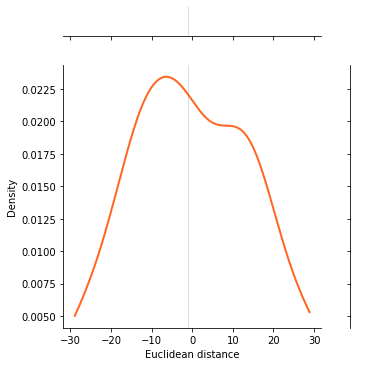

In [326]:
g = sns.JointGrid(height=5, ratio=5, space=1)
sns.kdeplot(x='Euclidean distance', linewidth=2, bw_adjust=1,
            data=df,ax=g.ax_joint,#hue="components",
            clip=[np.min(df['Euclidean distance']),np.max(df['Euclidean distance'])],
                  color='#FF6720')#'#F29D4B')
g.refline(x=np.median(df['Euclidean distance']), ls='-', c='grey',alpha=0.5,linewidth=0.5)

#sns.kdeplot(df, x='Euclidean distance', kind="kde",bw_adjust=1,ax=g.ax_joint,
 #           clip=[np.min(df['Euclidean distance']),np.max(df['Euclidean distance'])], color="r")

/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/1000min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/100min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/200min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/500min/K_9/comp_zscored/*4D_K*
/cerebro/cerebro1/dataset/bmpd/derivatives/HealthyControls_project//ICA/results_spine_only/mtl/spinalcord/iterations_tests/1000min/K_9/comp_zscored/*4D_K*
METHOD 3: Comparing sets of components across durations
... Computing similarity for K=9 between t=100 min and t=1000 min
... Computing similarity for K=9 between t=200 min and t=1000 min
... Computing similarity for K=9 between

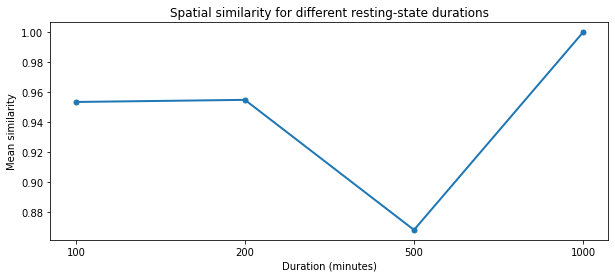

In [38]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="mtl"
t_range=[100,200,500,1000]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(9,10),'dataset':dataset, 'analysis':"ica_duration",'t_range':[1000]}
params_quant_gva_2 = {'k_range':range(9,10), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=9,t_range1=1000,t_range2=t_range,similarity_method='Dice',save_results=False,save_figure=False)

METHOD 3: Comparing sets of components across durations
... Computing similarity for K=5 between t=1 min and t=15 min
... Computing similarity for K=5 between t=2 min and t=15 min
... Computing similarity for K=5 between t=3 min and t=15 min
... Computing similarity for K=5 between t=4 min and t=15 min
... Computing similarity for K=5 between t=5 min and t=15 min
... Computing similarity for K=5 between t=6 min and t=15 min
... Computing similarity for K=5 between t=9 min and t=15 min
... Computing similarity for K=5 between t=12 min and t=15 min


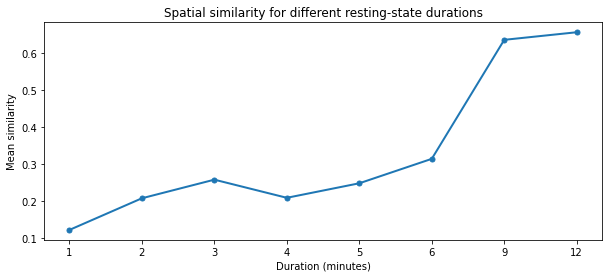

In [129]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
dataset="gva"
t_range=[1,2,3,4,5,6,9,12]#config["ica_ana"]["rs_duration"][dataset]
params_quant_gva_1 = {'k_range':range(5,6),'dataset':dataset, 'analysis':"ica_duration",'t_range':[15]}
params_quant_gva_2 = {'k_range':range(5,6), 'dataset':dataset, 'analysis':"ica_duration", 't_range': t_range}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

spine_analysis_gva.spatial_similarity(k1=5,t_range1=15,t_range2=t_range,similarity_method='Euclidean distance',save_results=True,save_figure=True)

### Analyze spatial similarity
**Spatial similarity can be explored in two different ways:**
1. To obtain a similarity matrix for a particular K per condition
> In that case, pass `k1` (and `k2`if different) as arguments <br>
2. To look at the evolution of the mean similarity across different Ks
> In that case, pass `k_range` as argument

#### Matching is not great for low K, but good otherwise

In [185]:
# Load the config files with all informations (i.e., all datasets, methods, etc.)
with open('../config/config_spine_only_CL.json') as config_file:
    config = json.load(config_file)

METHOD 1: Comparing two sets of components at specific K values 
gva_ica_duration2 at K = 5 vs gva_ica_duration at K = 5 

The mean similarity is 1.00


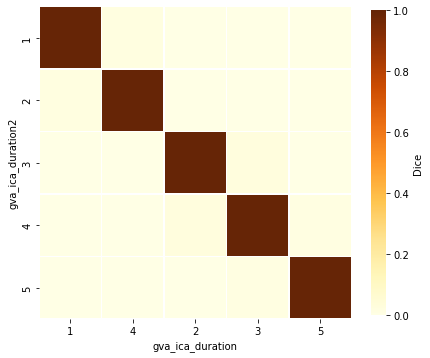

In [224]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_gva_1 = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica_duration',"duration": "15min"}
params_quant_gva_2 = {'k_range':range(5,6), 'dataset':'gva', 'analysis':'ica_duration',"duration": "2min"}

spine_analysis_gva = SpineOnlyAnalysis(config,params1=params_quant_gva_1,params2=params_quant_gva_2)

# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=5,k2=5,similarity_method='Dice',save_results=False,save_figure=False)

In [206]:
t_range2=2

In [210]:
np.array(t_range2).size

1

METHOD 1: Comparing two sets of components at specific K values 
gva_ica at K = 20 vs mtl_ica at K = 36 

The mean similarity is 0.47


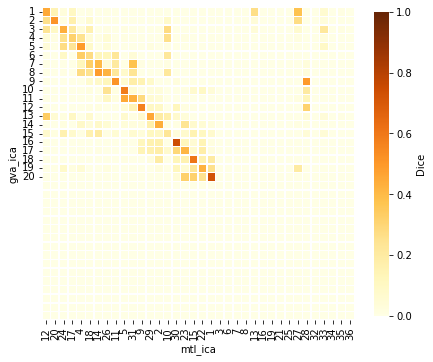

In [172]:
# Similarity has been computed using 'Dice', but 'Cosine' or 'Euclidean distance' could be used instad
spine_analysis_gva.spatial_similarity(k1=20,k2=36,similarity_method='Dice')

### Investigate axial distribution for different Ks

### `ICA` method

### Instantiate class

### Instantiate class

In [236]:
# Define parameters for the datasets to compare
# Each param dict has 3 values: k_range, dataset and analysis
params_quant_icap_1 = {'k_range':range(4,41), 'dataset':'gva', 'analysis':'icap'}
params_quant_icap_2 = {'k_range':range(4,41), 'dataset':'mtl', 'analysis':'icap'}

spine_analysis_icap = SpineOnlyAnalysis(config,params1=params_quant_icap_1,params2=params_quant_icap_2)

### Analyze spatial similarity

#### Not great for low K, good for high K

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 4 vs mtl_icap at K = 8 

The mean similarity is 0.65


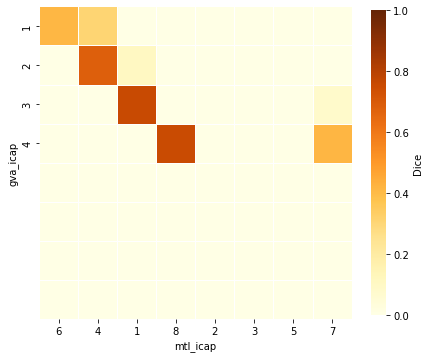

In [237]:
spine_analysis_icap.spatial_similarity(k1=4,k2=8,similarity_method='Dice')

METHOD 1: Comparing two sets of components at specific K values 
gva_icap at K = 20 vs mtl_icap at K = 40 

The mean similarity is 0.54


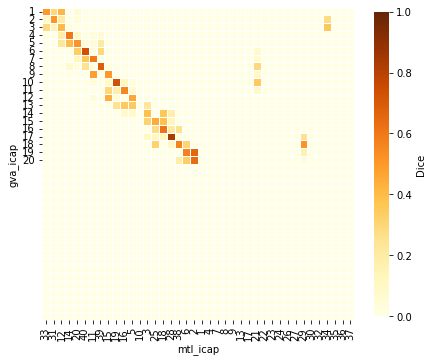

In [238]:
spine_analysis_icap.spatial_similarity(k1=20,k2=40,similarity_method='Dice')